## Tutorial
The goal of this tutorial is to show how to use the molecule data handler.

In [5]:
from src.molecule_classes_and_functions import Molecule
from src.molecule_import import load_molecule_list_from_pickle
import os

In [2]:
path = 'stored_molecule_list_B'
os.chdir('/home/niklas/PycharmProjects/2-molecule_data_handler/src')
os.getcwd()
molecule_list_150 = load_molecule_list_from_pickle(path)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
import numpy as np
import os
import pickle
from pprint import pprint

In [7]:
class Annotation3D(Annotation):
    """ Annotate the point xyz with text s """

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self, s, xy=(0, 0), *args, **kwargs)
        self._verts3d = xyz

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy = (xs, ys)
        Annotation.draw(self, renderer)


def annotate3D(ax, s, *args, **kwargs):
    """ add annotation text s to to Axes3d ax """

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

In [12]:
# first_molecule = molecule_list_150[4]
first_molecule = Molecule.from_smiles('CCCC')
df1 = first_molecule.bond_distances_as_dataframe()
only_atoms = df1['atoms']
first_molecule.visualize_as_3d_plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
%matplotlib widget
atom_list = first_molecule.contained_atoms

fig = plt.figure(figsize=plt.figaspect(1)*1.3, dpi=80)
ax = fig.gca(projection='3d')
ax.set_axis_off()

for atom1, atom2 in only_atoms:
    ax.plot3D([atom1.x, atom2.x], [atom1.y, atom2.y], [atom1.z, atom2.z], '#525252', alpha=0.7)

element_colors = {'H': '#d9d9d9', 'B': '#ffbf80', 'C': '#000000', 'N': '#0000ff', 'O': '#ff3300', 'F': '#00e600',
                  'Si': '#4d4d4d', 'P': '#ff9900', 'S': '#e6e600', 'Cl': '#00e600', 'Br': '#990000', 'I': '#6600cc'}
for atom in atom_list:
    color = element_colors[atom.element]
    ax.scatter(atom.x, atom.y, atom.z, s=150, label='True Position', color=color, alpha=0.7, depthshade=False)

for atom in atom_list:
    coords = (atom.x, atom.y, atom.z)
    annotate3D(ax, s=str(atom.element), xyz=coords, fontsize=10, xytext=(-3, 3),
               textcoords='offset points', ha='right', va='bottom')

scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
# factor = 0.9
factor = 0.5
ax.auto_scale_xyz(*[[factor*np.min(scaling), factor*np.max(scaling)]]*3)

import matplotlib.animation as animation
def rotate(angle):
    ax.view_init(azim=angle)
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('rotation.gif', writer='imagemagick', fps=10)

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

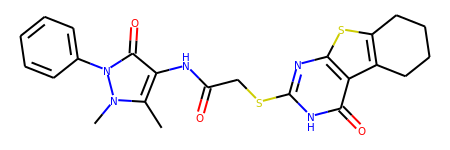

In [3]:
from rdkit import Chem
mol_smi = 'Cc1c(NC(=O)CSc2nc3sc4c(c3c(=O)[nH]2)CCCC4)c(=O)n(-c2ccccc2)n1C'
m1 = Chem.MolFromSmiles(mol_smi)
m1

In [4]:
m1.GetNumAtoms()

33

In [8]:
m1 = Chem.AddHs(m1)
m1.GetNumAtoms()

56

In [10]:
# heavy_atoms == non-hydrogen atoms:
m1.GetNumHeavyAtoms()

33

In [40]:
# suppl = Chem.SmilesMolSupplier('150_smiles-strings_example.smi')
suppl = Chem.SDMolSupplier('3_molecules.sdf')
counter = 0
for mol in suppl:
    if mol is None:   # its a good practice to test each molecule to see it was correctly read !
        continue
    counter += 1

counter

3

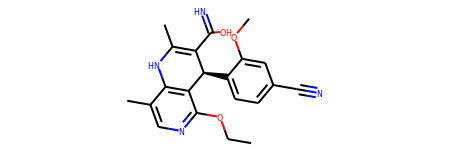

In [7]:
# Finerenone (clinical phase III drug of Bayer)
from rdkit import Chem
drug_smiles = 'CCOc1ncc(C)c2c1[C@H](c1ccc(C#N)cc1OC)C(C(=N)O)=C(C)N2'
drug_mol = Chem.MolFromSmiles(drug_smiles)
drug_mol

In [6]:
drug_smiles_inchi = 'InChI=1S/C21H22N4O3/c1-5-28-21-18-17(14-7-6-13(9-22)8-15(14)27-4)16(20(23)26)12(3)25-19(18)11(2)10-24-21/h6-8,10,17,25H,5H2,1-4H3,(H2,23,26)/t17-/m1/s1'
drug_mol2 = Chem.MolFromInchi(drug_smiles_inchi)
molo = Chem.MolToSmiles(drug_mol2)
molo

'CCOc1ncc(C)c2c1[C@H](c1ccc(C#N)cc1OC)C(C(=N)O)=C(C)N2'

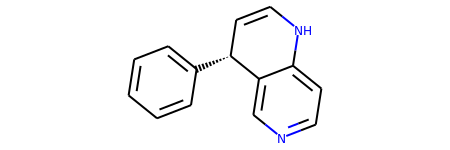

In [8]:
# creating a molecules Murcko_scaffold:
drugs_murcko = 'C1=C[C@@H](c2ccccc2)c2cnccc2N1'
drug_murck = Chem.MolFromSmiles(drugs_murcko)
drug_murck